<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
In this document we collect a naive <i>type system</i> based on sets.
</div>

In [1]:
from itertools import repeat
from sympy import *
#from type_system import *

In [2]:
%run ../../src/commons.py

In [3]:
%run ./type-system.py

---

In [4]:
init_printing()

In [5]:
x,y,m,n,t,z = symbols('x y m n t z', commutative=True)
alpha, beta, gamma, eta = symbols(r'\alpha \beta \gamma \eta', commutative=True)
f,g = Function('f'), Function('g')

# lists

In [6]:
lst_of_alpha_gf, = lst(tyvar(alpha)[z]).gf()
lst_of_alpha_gf

In [7]:
occupancy(lst_of_alpha_gf, syms=[alpha], objects='unlike', boxes='unlike').series(z)

In [8]:
occupancy(lst_of_alpha_gf, syms=[alpha], objects='unlike', boxes='like').series(z)

In [9]:
occupancy(lst_of_alpha_gf, syms=[alpha], objects='like', boxes='unlike').series(z)

In [10]:
occupancy(lst_of_alpha_gf, syms=[alpha], objects='like', boxes='like').series(z)

---

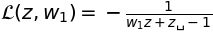

In [12]:
lst_of_maybe_of_alpha_gf, = lst(maybe(truth)[z]).gf()
lst_of_maybe_of_alpha_gf

In [13]:
occupancy(lst_of_maybe_of_alpha_gf, syms=[w[1]], objects='unlike', boxes='unlike').series(z, n=5)

In [14]:
occupancy(lst_of_maybe_of_alpha_gf, syms=[w[1]], objects='unlike', boxes='like').series(z, n=5)

In [15]:
occupancy(lst_of_maybe_of_alpha_gf, syms=[w[1]], objects='like', boxes='unlike').series(z, n=5)

In [16]:
occupancy(lst_of_maybe_of_alpha_gf, syms=[w[1]], objects='like', boxes='like').series(z,n=5)

---

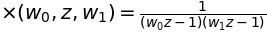

In [24]:
nats = (lst(truth[z]) * lst(falsehood[z]))
nats_gf, = nats.gf()
nats_gf

In [25]:
occupancy(nats_gf, syms=[w[1],w[0]], objects='unlike', boxes='unlike').series(z)

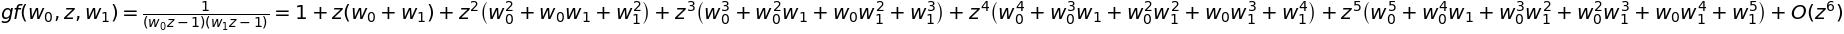

In [19]:
occupancy(nats_gf, syms=[w[1],w[0]], objects='unlike', boxes='like').series(z)

In [20]:
occupancy(nats_gf, syms=[w[1],w[0]], objects='like', boxes='unlike').series(z)

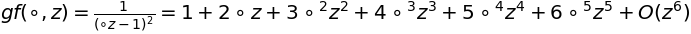

In [21]:
occupancy(nats_gf, syms=[w[1],w[0]], objects='like', boxes='like').series(z)

---

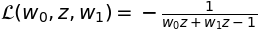

In [26]:
lst_of_boolean_gf, = lst(boolean[z]).gf()
lst_of_boolean_gf

In [27]:
occupancy(lst_of_boolean_gf, syms=[w[1],w[0]], objects='unlike', boxes='unlike').series(z, n=5)

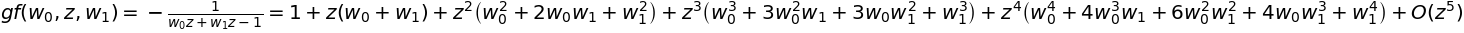

In [28]:
occupancy(lst_of_boolean_gf, syms=[w[1],w[0]], objects='unlike', boxes='like').series(z, n=5)

In [29]:
occupancy(lst_of_boolean_gf, syms=[w[1],w[0]], objects='like', boxes='unlike').series(z, n=5)

In [30]:
occupancy(lst_of_boolean_gf, syms=[w[1],w[0]], objects='like', boxes='like').series(z, n=5)

---

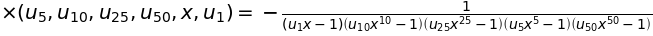

In [31]:
dollar_exchange, = (lst(tyvar(u[1]*x)) * lst(tyvar(u[5]*x**5)) * lst(tyvar(u[10]*x**10)) * 
                    lst(tyvar(u[25]*x**25)) * lst(tyvar(u[50]*x**50))).gf()
dollar_exchange

In [32]:
coins = dollar_exchange.series(x, n=101)

In [33]:
coins.rhs.rhs.coeff(x,42)

In [34]:
assert 292 == coins.rhs.rhs.coeff(x,100).subs( # number of ways to change *one* dollar
    {u[1]:1, u[5]:1, u[10]:1, u[25]:1, u[50]:1})

# non-empty lists

In [35]:
nnlst_of_alpha_gf, = nnlst(tyvar(alpha*z)).gf()
nnlst_of_alpha_gf

In [36]:
nnlst_of_alpha_gf.series(z, n=10)

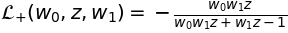

In [38]:
nnlst_gf, = nnlst(nnlst(truth[z])*falsehood).gf()
nnlst_gf

In [39]:
occupancy(nnlst_gf, syms=[w[1],w[0]], objects='unlike', boxes='unlike').series(z, n=5)

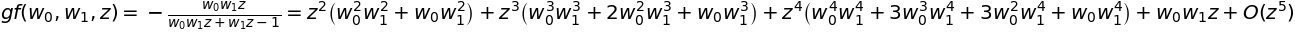

In [40]:
occupancy(nnlst_gf, syms=[w[1],w[0]], objects='unlike', boxes='like').series(z, n=5)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.